In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shapely
import random

In [4]:
cali = './ca_state/CA_State.shp'
cali_borders = gpd.read_file(cali).to_crs(4269)

shp_file = './phzm_us_zones_shp_2023/phzm_us_zones_shp_2023.shp'
data = gpd.read_file(shp_file)

In [5]:
print(data)
print(cali_borders)

    Id  gridcode zone      trange       zonetitle  \
0    1         0   3a  -40 to -35  3a: -40 to -35   
1    2         1   3b  -35 to -30  3b: -35 to -30   
2    3         2   4a  -30 to -25  4a: -30 to -25   
3    4         3   4b  -25 to -20  4b: -25 to -20   
4    5         4   5a  -20 to -15  5a: -20 to -15   
5    6         5   5b  -15 to -10  5b: -15 to -10   
6    7         6   6a   -10 to -5   6a: -10 to -5   
7    8         7   6b     -5 to 0     6b: -5 to 0   
8    9         8   7a      0 to 5      7a: 0 to 5   
9   10         9   7b     5 to 10     7b: 5 to 10   
10  11        10   8a    10 to 15    8a: 10 to 15   
11  12        11   8b    15 to 20    8b: 15 to 20   
12  13        12   9a    20 to 25    9a: 20 to 25   
13  14        13   9b    25 to 30    9b: 25 to 30   
14  15        14  10a    30 to 35   10a: 30 to 35   
15  16        15  10b    35 to 40   10b: 35 to 40   
16  17        16  11a    40 to 45   11a: 40 to 45   
17  18        17  11b    45 to 50   11b: 45 to

<Axes: >

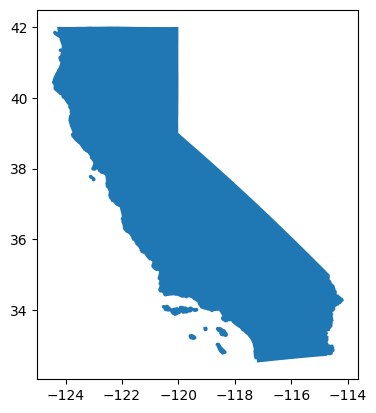

In [6]:
cali_borders.plot()

In [7]:
# palette = sns.color_palette("Paired", len(data))
data['color'] = sns.color_palette("Paired", len(data))

<Axes: >

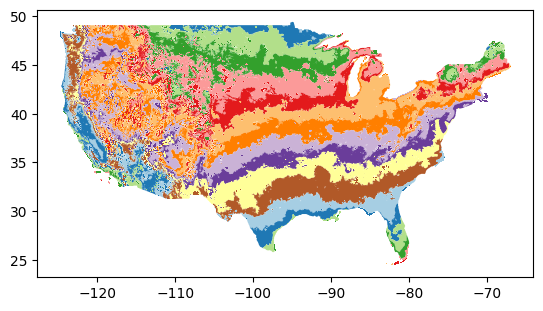

In [8]:
data.plot(color=data['color'])

In [9]:
intersection = data.overlay(cali_borders)
print(intersection)

    Id  gridcode zone      trange       zonetitle  \
0    4         3   4b  -25 to -20  4b: -25 to -20   
1    5         4   5a  -20 to -15  5a: -20 to -15   
2    6         5   5b  -15 to -10  5b: -15 to -10   
3    7         6   6a   -10 to -5   6a: -10 to -5   
4    8         7   6b     -5 to 0     6b: -5 to 0   
5    9         8   7a      0 to 5      7a: 0 to 5   
6   10         9   7b     5 to 10     7b: 5 to 10   
7   11        10   8a    10 to 15    8a: 10 to 15   
8   12        11   8b    15 to 20    8b: 15 to 20   
9   13        12   9a    20 to 25    9a: 20 to 25   
10  14        13   9b    25 to 30    9b: 25 to 30   
11  15        14  10a    30 to 35   10a: 30 to 35   
12  16        15  10b    35 to 40   10b: 35 to 40   
13  17        16  11a    40 to 45   11a: 40 to 45   
14  18        17  11b    45 to 50   11b: 45 to 50   

                                                color  OBJECTID REGION  \
0      (0.2, 0.6274509803921569, 0.17254901960784313)        56      4   
1  

<Axes: >

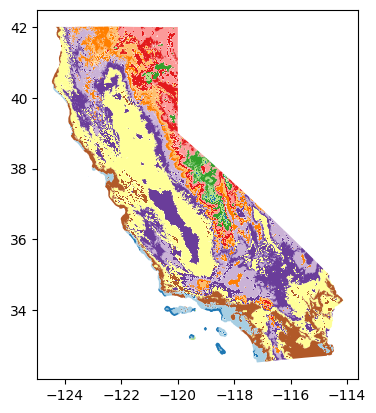

In [10]:
intersection['color'] = sns.color_palette("Paired", len(intersection))
intersection.plot(color=intersection['color'])

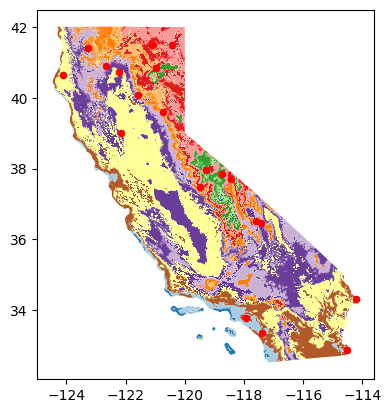

[(<POINT (-119.28 37.968)>, '6a_7'), (<POINT (-118.727 37.86)>, '6a_8'), (<POINT (-119.485 37.472)>, '6b_7'), (<POINT (-120.446 41.482)>, '6b_8'), (<POINT (-120.971 40.838)>, '7a_7'), (<POINT (-121.122 41.497)>, '7a_8'), (<POINT (-118.439 37.709)>, '7b_7'), (<POINT (-117.587 36.523)>, '7b_8'), (<POINT (-123.271 41.399)>, '8a_7'), (<POINT (-120.752 39.588)>, '8a_8'), (<POINT (-121.592 40.081)>, '8b_7'), (<POINT (-122.663 40.904)>, '8b_8'), (<POINT (-117.433 36.463)>, '9a_7'), (<POINT (-122.157 38.994)>, '9a_8'), (<POINT (-122.214 40.72)>, '9b_7'), (<POINT (-124.127 40.647)>, '9b_8'), (<POINT (-117.395 33.354)>, '10a_7'), (<POINT (-114.205 34.315)>, '10a_8'), (<POINT (-114.515 32.882)>, '10b_7'), (<POINT (-117.943 33.786)>, '10b_8')]


In [39]:
def gen_random_points(multi_p, num_points):
    points = []
    minx, miny, maxx, maxy = multi_p.bounds

    def distant(pt, others, min_dist=0.05):
        for o in others:
            if abs(pt.x - o.x) < min_dist or abs(pt.y - o.y) < min_dist:
                return False
            
        return True

    from shapely.geometry import Point
    while len(points) < num_points:
        pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if multi_p.contains(pnt) and distant(pnt, points):
            points.append(pnt)
    return points

base = 7
all_pts = []
ax = intersection.plot(color=intersection['color'])
for idx, row in intersection.iterrows():
    if row['geometry'].area < 0.5:
        continue

    pts = gen_random_points(row['geometry'], 2)
    all_pts.extend([(pt, f'{row['zone']}_{idx+base}') for idx, pt in enumerate(pts)])
    gdf_points = gpd.GeoDataFrame(pd.DataFrame(pts), geometry=pts, crs="EPSG:4326")
    gdf_points.plot(ax=ax, marker='o', color='red', markersize=20, zorder=2)

plt.show()
print(all_pts)

In [32]:
pt = all_pts[0][0]

In [40]:
import ee

try:
    ee.Initialize()
except Exception:
    pass

for pt, id in all_pts:
    region = ee.Geometry.Rectangle([pt.x - 0.01, pt.y - 0.01, pt.x + 0.01, pt.y + 0.01])

    dataset = ee.ImageCollection('USDA/NAIP/DOQQ') \
        .filter(ee.Filter.date('2022-01-01', '2023-12-31')) \
        .filterBounds(region) \
        .select(['R', 'G', 'B']) \
        .mean()
    
    image = dataset.clip(region)

    task = ee.batch.Export.image.toDrive(
        image=image,
        description=f'{id}',
        folder='EE_Exports',  # Folder in your Google Drive
        region=region,
        scale=0.5,  # Resolution in meters per pixel
        crs='EPSG:4326',
        fileFormat='GeoTIFF'
    )

    task.start()
    print(f"Export task started: {task.status()['state']}")

Export task started: READY
Export task started: READY
Export task started: READY
Export task started: READY
Export task started: READY
Export task started: READY
Export task started: READY
Export task started: READY
Export task started: READY
Export task started: READY
Export task started: READY
Export task started: READY
Export task started: READY
Export task started: READY
Export task started: READY
Export task started: READY
Export task started: READY
Export task started: READY
Export task started: READY
Export task started: READY


In [28]:
region = ee.Geometry.Rectangle([pt.x - 0.001, pt.y - 0.001, pt.x + 0.001, pt.y + 0.001])

dataset = ee.ImageCollection('USDA/NAIP/DOQQ') \
    .filter(ee.Filter.date('2022-01-01', '2023-12-31')) \
    .filterBounds(region) \
    .select(['R', 'G', 'B']) \
    .mean()

image = dataset.clip(region)

task = ee.batch.Export.image.toCloudStorage(
    image=image,
    description=f'{id}',
    bucket='california_tifs',
    fileNamePrefix='export_cloud',
    region=region,
    scale=1,  # Resolution in meters per pixel
    crs='EPSG:4326',
    fileFormat='GeoTIFF'
)

task.start()
print(f"Export task started: {task.status()['state']}")

Export task started: READY


In [26]:
import time
print(task)
while task.status()['state'] == 'RUNNING' or task.status()['state'] == 'READY':
    print('Task is still running...')
    time.sleep(10)
print(f"Task finished with status: {task.status()['state']}")

<Task YZXYZQQQF4KUIMDZGCZN6OVH Type.EXPORT_IMAGE: 10b_0 (State.UNSUBMITTED)>
Task is still running...
Task is still running...
Task is still running...
Task finished with status: FAILED
